Refer - 
https://towardsdatascience.com linear-discriminant-analysis-in-python-76b8b17817c2
Data Set - https://omarshehata.github.io/lda-explorable/

## ***Using Direct Function of the library***

In [ ]:
# Import the libraries we need
import numpy as np
import pandas as pd
from numpy.linalg import matrix_rank
import matplotlib.pyplot as plt ``
from sklearn.preprocessing import scale
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

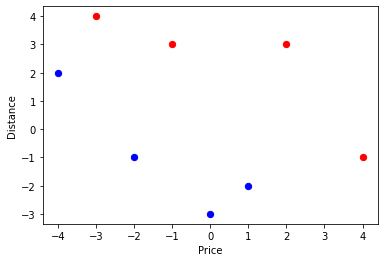

In [ ]:
data_url = 'https://omarshehata.github.io/lda-explorable/data/sample-2d.csv'
data = pd.read_csv(data_url)

# Flip the Y to match the JavaScript graph 
data['Distance'] = -data['Distance']

ax = data[data['class'] == 0].plot.scatter(x='Price', y='Distance', c='red', s=40);
ax = data[data['class'] == 1].plot.scatter(x='Price', y='Distance', c='blue', s=40,ax=ax);

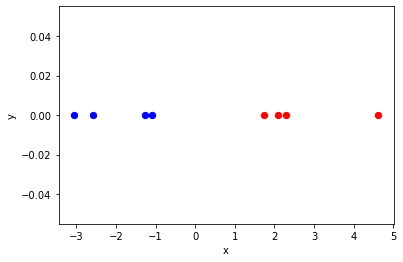

In [ ]:
# Initialize the LDA to reduce to 1 dimension
LDA = LinearDiscriminantAnalysis(n_components=1, solver='eigen')
# Separate the data and class 
Features = data.loc[:,'Price':'Distance'].values
Classes = data['class']
# Find the best projection 
ProjectedData = LDA.fit_transform(Features, Classes)
# Put it in a dataframe and plot it
n = ProjectedData.shape[0]
newData = pd.DataFrame(data={
    'class' : Classes,
    'x' : ProjectedData.reshape(n),
    'y' : np.zeros(n)
})

ax = newData[newData['class'] == 0].plot.scatter(x='x', y='y', c='red', s=40);
ax = newData[newData['class'] == 1].plot.scatter(x='x', y='y', c='blue', s=40,ax=ax);

## ***FROM SCRATCH***

In [ ]:
# Import the libraries we need
import numpy as np
import pandas as pd
from numpy.linalg import matrix_rank
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving bmd.csv to bmd (1).csv


In [ ]:
import io

data = pd.read_csv(io.BytesIO(uploaded['bmd.csv']))
print(data)
n_components = 2
data = data[['age','waiting_time','height_cm','bmd','fracture']]
data

        id        age sex     fracture  weight_kg  height_cm      medication  \
0      469  57.052768   F  no fracture       64.0      155.5  Anticonvulsant   
1     8724  75.741225   F  no fracture       78.0      162.0   No medication   
2     6736  70.778900   M  no fracture       73.0      170.5   No medication   
3    24180  78.247175   F  no fracture       60.0      148.0   No medication   
4    17072  54.191877   M  no fracture       55.0      161.0   No medication   
..     ...        ...  ..          ...        ...        ...             ...   
164  21892  77.982543   M     fracture       74.0      164.0   No medication   
165  24140  50.285303   F     fracture       59.0      161.0   No medication   
166   6969  46.359721   M     fracture       67.0      169.0   No medication   
167   5505  54.788368   M     fracture       70.0      166.0   No medication   
168     71  69.994822   F     fracture       68.5      165.0   No medication   

     waiting_time     bmd  
0          

,age,waiting_time,height_cm,bmd,fracture
0,57.052768,18,155.5,0.8793,no fracture
1,75.741225,56,162.0,0.7946,no fracture
2,70.778900,10,170.5,0.9067,no fracture
3,78.247175,14,148.0,0.7112,no fracture
4,54.191877,20,161.0,0.7909,no fracture
...,...,...,...,...,...
164,77.982543,49,164.0,0.7941,fracture
165,50.285303,6,161.0,0.7971,fracture
166,46.359721,10,169.0,0.8037,fracture
167,54.788368,14,166.0,0.8072,fracture


In [ ]:
#Normalizing the attributes and encoding labels
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(data.iloc[:,range(0,4)].values)
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(data['fracture'].values)

In [ ]:
#Between class variance
S_W = np.zeros((4,4))
for i in range(2):
  S_W += np.cov(X_train_std[y==i].T)
S_W

array([[ 1.9725685 ,  0.02421145, -0.42736814, -0.30524193],
       [ 0.02421145,  2.17968717,  0.04800246, -0.24785212],
       [-0.42736814,  0.04800246,  2.03028906,  0.56144434],
       [-0.30524193, -0.24785212,  0.56144434,  1.0964439 ]])

In [ ]:
#Distance between mean and sample of class
N=np.bincount(y)
vecs=[]
[vecs.append(np.mean(X_train_std[y==i],axis=0)) for i in range(2)]
mean_overall = np.mean(X_train_std, axis=0)
S_B=np.zeros((4,4))
for i in range(2):
  S_B += N[i]*(((vecs[i]-mean_overall).reshape(4,1)).dot(((vecs[i]-mean_overall).reshape(1,4))))
S_B

array([[ 17.63488395,   7.99743004,  -4.31743302, -34.05701777],
       [  7.99743004,   3.62683913,  -1.95795836, -15.4448772 ],
       [ -4.31743302,  -1.95795836,   1.05700882,   8.33795637],
       [-34.05701777, -15.4448772 ,   8.33795637,  65.77193605]])

In [ ]:
#Display eigen values
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)
print('Eigenvalues in decreasing order:\n')
for eigen_val in eigen_pairs:
  print(eigen_val[0])

Eigenvalues in decreasing order:

68.80523361156833
9.634980319338755e-16
9.634980319338755e-16
0.0


In [ ]:
#Finding LD1 & LD2
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
W=np.hstack((eigen_pairs[0][1][:, ].reshape(4,1),eigen_pairs[1][1][:, ].reshape(4,1))).real
X_train_lda = X_train_std.dot(W)
#Adding LD1 & LD2 Value to dataframe
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,-0.780467,0.003799,1
1,0.111018,-1.124740,1
2,-0.306831,-0.377874,1
3,0.235405,-1.080934,1
4,-0.142198,0.606851,1


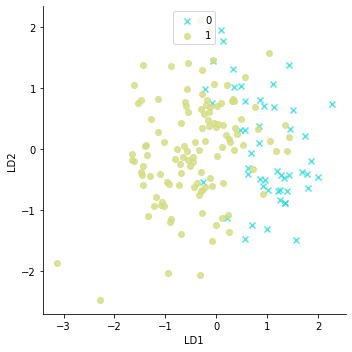

In [ ]:
#Visualizing the data after LDA
import seaborn as sns
markers = ['x','o']
sns.lmplot(x="LD1", y="LD2", data=data, markers=markers,fit_reg=False, hue='class',
legend=False, palette='rainbow')
plt.legend(loc='upper center')
plt.show()

In [ ]:
#KNN Classifier
X_train, X_test, y_train, y_test = train_test_split(data[['LD1','LD2']], data['class'],test_size=0.20)
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Train score ",knn.score(X_train,y_train),"%")
print("Test score ",knn.score(X_test,y_test),"%")

Train score  0.9259259259259259 %
Test score  0.8529411764705882 %
